<a href="https://colab.research.google.com/github/SusanYTSu/predict_staff_turnover/blob/main/Staff_Turnover_Upload_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Employee Attrition

### Import Data and Prelim Exploration

In [1]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# import training set
hr_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle employee attrition/Final dataset Attrition.csv')

In [ ]:
# check data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

In [ ]:
hr_df.head(20)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN
5,19,Yes,Travel_Rarely,Sales,22,Male,3,1,Sales Representative,3,Single,1675,1,Yes,19,3,0,0,2,0,0,0,PHD,14-04-2021,NaN,Work Accident,WFH,1,1,Yes,Job Portal,Part Time,NaN
6,19,Yes,Travel_Frequently,Sales,1,Female,1,1,Sales Representative,1,Single,2325,0,No,21,4,0,1,5,0,0,0,PHD,12-01-2021,NaN,Work Accident,WFH,2,2,No,Walk-in,Contract,NaN
7,28,Yes,Travel_Rarely,Research & Development,2,Male,3,1,Laboratory Technician,3,Single,3485,2,No,11,3,0,5,5,0,0,0,Post-Graduation,30-05-2021,NaN,Work Environment,WFH,0,2,No,Walk-in,Contract,NaN
8,29,No,Travel_Rarely,Sales,2,Male,2,2,Sales Executive,2,Married,6644,2,No,19,3,2,10,2,0,0,0,Graduation,28-02-2021,NaN,Better Opportunity,OFFICE,5,2,No,Walk-in,Part Time,NaN
9,18,Yes,Travel_Rarely,Research & Development,3,Male,3,1,Laboratory Technician,3,Single,1420,1,No,13,3,0,0,2,0,0,0,PHD,06-05-2021,NaN,Work Environment,WFH,5,2,No,Walk-in,FullTime,NaN


In [ ]:
#Check for Missing Values
hr_df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

In [4]:
# Drop cols with no values / useless cols
hr_df.drop(["Date_of_termination","Unnamed: 32","Date_of_Hire"], axis = 1, inplace = True)

In [5]:
# get the list of categorical and numerical variables
cate_var = hr_df.select_dtypes(include="object").columns
num_var = hr_df.select_dtypes(include=["int64","float64"]).columns

In [6]:
cate_var,num_var

(Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving',
        'Mode_of_work', 'Work_accident', 'Source_of_Hire', 'Job_mode'],
       dtype='object'),
 Index(['Age', 'DistanceFromHome', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Leaves',
        'Absenteeism'],
       dtype='object'))

In [7]:
X = hr_df.drop("Attrition", axis = 1)
y = hr_df["Attrition"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
train = pd.concat([X_train,y_train],axis=1)

In [10]:
test = pd.concat([X_test,y_test],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1097 to 1126
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1176 non-null   int64 
 1   BusinessTravel           1176 non-null   object
 2   Department               1176 non-null   object
 3   DistanceFromHome         1176 non-null   int64 
 4   Gender                   1176 non-null   object
 5   JobInvolvement           1176 non-null   int64 
 6   JobLevel                 1176 non-null   int64 
 7   JobRole                  1176 non-null   object
 8   JobSatisfaction          1176 non-null   int64 
 9   MaritalStatus            1176 non-null   object
 10  MonthlyIncome            1176 non-null   int64 
 11  NumCompaniesWorked       1176 non-null   int64 
 12  OverTime                 1176 non-null   object
 13  PercentSalaryHike        1176 non-null   int64 
 14  PerformanceRating        1176 non-nul

In [ ]:
hr_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
for col in cate_var:
  print("__________________________")
  print(train[col].value_counts())


__________________________
No     986
Yes    190
Name: Attrition, dtype: int64
__________________________
Travel_Rarely        832
Travel_Frequently    219
Non-Travel           125
Name: BusinessTravel, dtype: int64
__________________________
Research & Development    762
Sales                     365
Human Resources            49
Name: Department, dtype: int64
__________________________
Male      711
Female    465
Name: Gender, dtype: int64
__________________________
Sales Executive              269
Research Scientist           224
Laboratory Technician        210
Manufacturing Director       118
Healthcare Representative    105
Manager                       82
Sales Representative          65
Research Director             62
Human Resources               41
Name: JobRole, dtype: int64
__________________________
Married     536
Single      378
Divorced    262
Name: MaritalStatus, dtype: int64
__________________________
No     842
Yes    334
Name: OverTime, dtype: int64
_______________

In [ ]:
train.groupby('Attrition').mean()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
Attrition,,,,,,,,,,,,,,,,,
No,37.429006,8.967546,2.782961,2.161258,2.784990,6851.639959,2.681542,15.195740,3.159229,0.838742,11.940162,2.849899,7.494929,2.333671,4.412779,2.560852,1.544625
Yes,33.594737,10.878947,2.521053,1.621053,2.431579,4703.489474,3.052632,15.168421,3.152632,0.578947,8.405263,2.631579,5.052632,1.863158,2.842105,2.363158,1.421053


In [ ]:
## categorical features break down by attrition
for col in cate_var:
  if col != "Attrition":
    print("_____________________________________________")
    print(f"{col} break down by Attrition")
    print(pd.crosstab(train[col],train["Attrition"], normalize = "index"))

_____________________________________________
BusinessTravel break down by Attrition
Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.912000  0.088000
Travel_Frequently  0.757991  0.242009
Travel_Rarely      0.848558  0.151442
_____________________________________________
Department break down by Attrition
Attrition                     No       Yes
Department                                
Human Resources         0.816327  0.183673
Research & Development  0.853018  0.146982
Sales                   0.810959  0.189041
_____________________________________________
Gender break down by Attrition
Attrition        No       Yes
Gender                       
Female     0.858065  0.141935
Male       0.825598  0.174402
_____________________________________________
JobRole break down by Attrition
Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.923810  0.076190
Human Resources 

In [ ]:
train[train.Attrition == "No"].Status_of_leaving

1097    Work Environment
727     Work Environment
254     Work Environment
1175       Work Accident
1341       Work Accident
              ...       
1130       Work Accident
1294    Work Environment
860               Salary
1459           Dept.Head
1126    Work Environment
Name: Status_of_leaving, Length: 986, dtype: object

## Data Visualization

### Numerical Features EDA

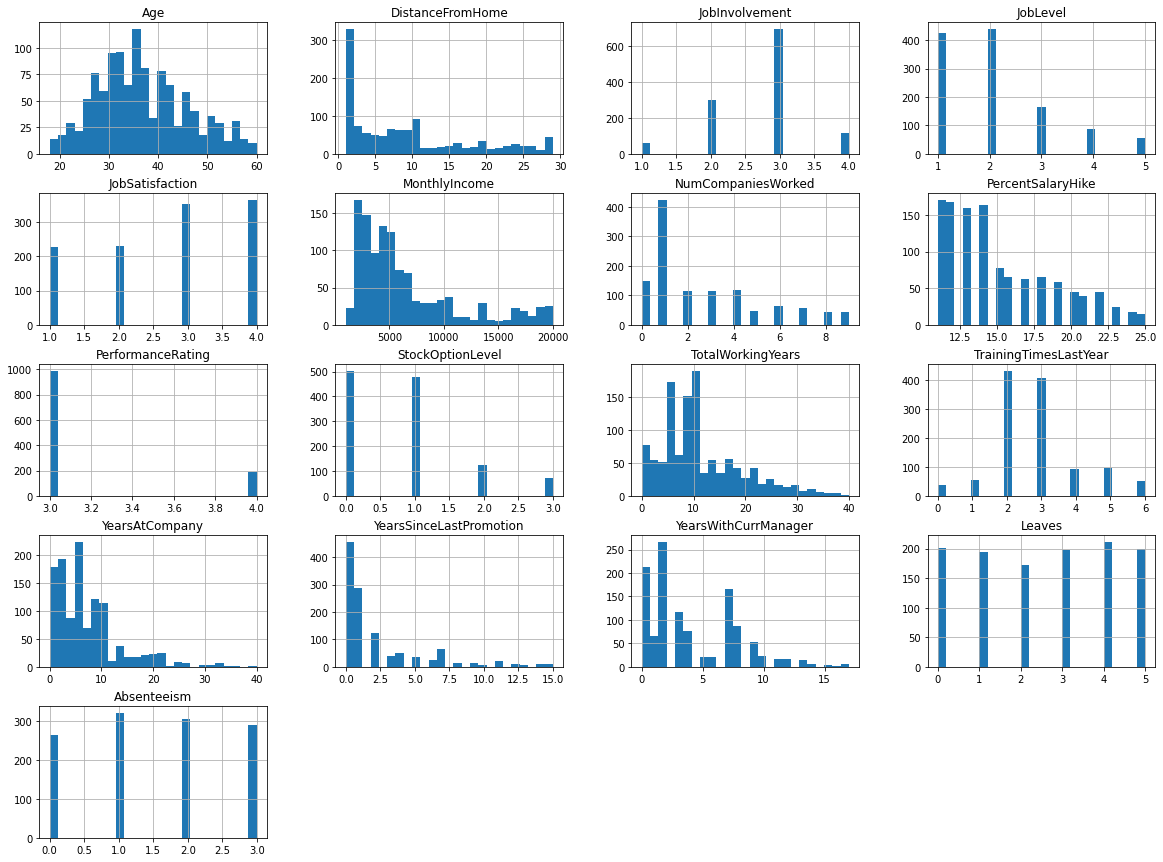

In [ ]:
#Histogram of numeric variables
num_bins = 25

train.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

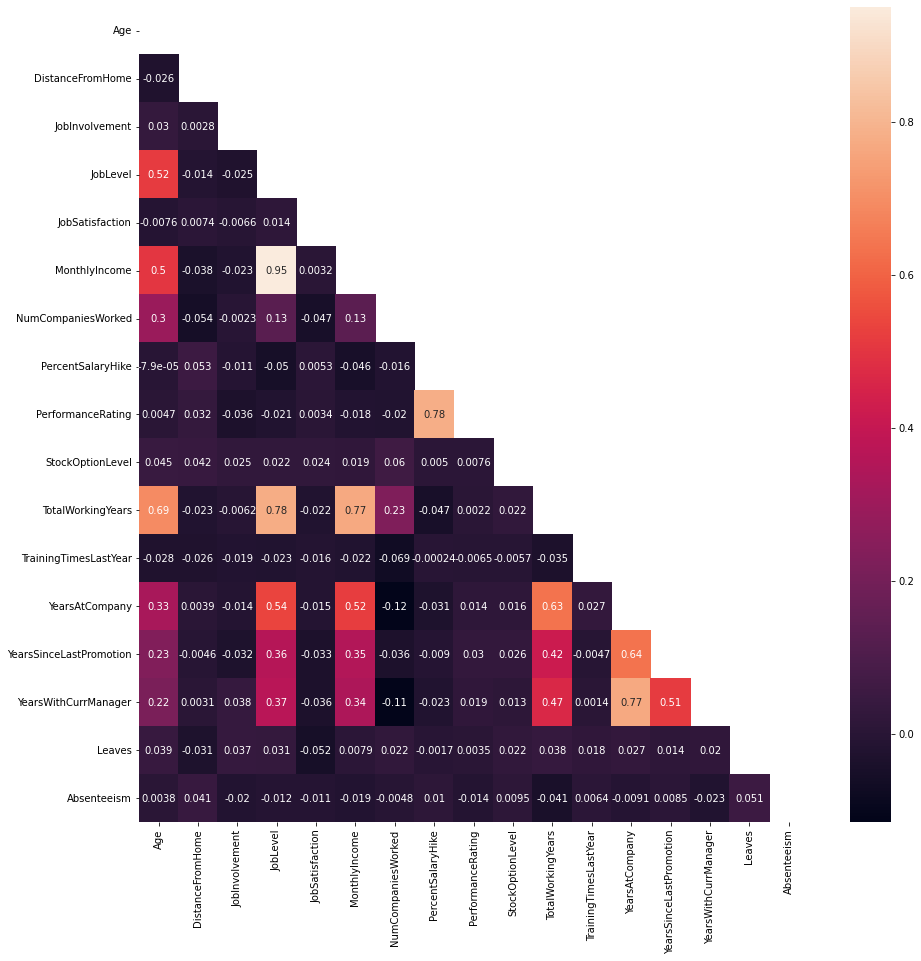

In [ ]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap="rocket",mask = mask)

In [ ]:
train.groupby('Attrition').mean().round(2).T

Attrition,No,Yes
Age,37.43,33.59
DistanceFromHome,8.97,10.88
JobInvolvement,2.78,2.52
JobLevel,2.16,1.62
JobSatisfaction,2.78,2.43
MonthlyIncome,6851.64,4703.49
NumCompaniesWorked,2.68,3.05
PercentSalaryHike,15.20,15.17
PerformanceRating,3.16,3.15
StockOptionLevel,0.84,0.58


In [ ]:
plt_lst1 = ["DistanceFromHome","Age","JobLevel","JobSatisfaction","MonthlyIncome","NumCompaniesWorked","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","PerformanceRating","YearsSinceLastPromotion","YearsWithCurrManager"]

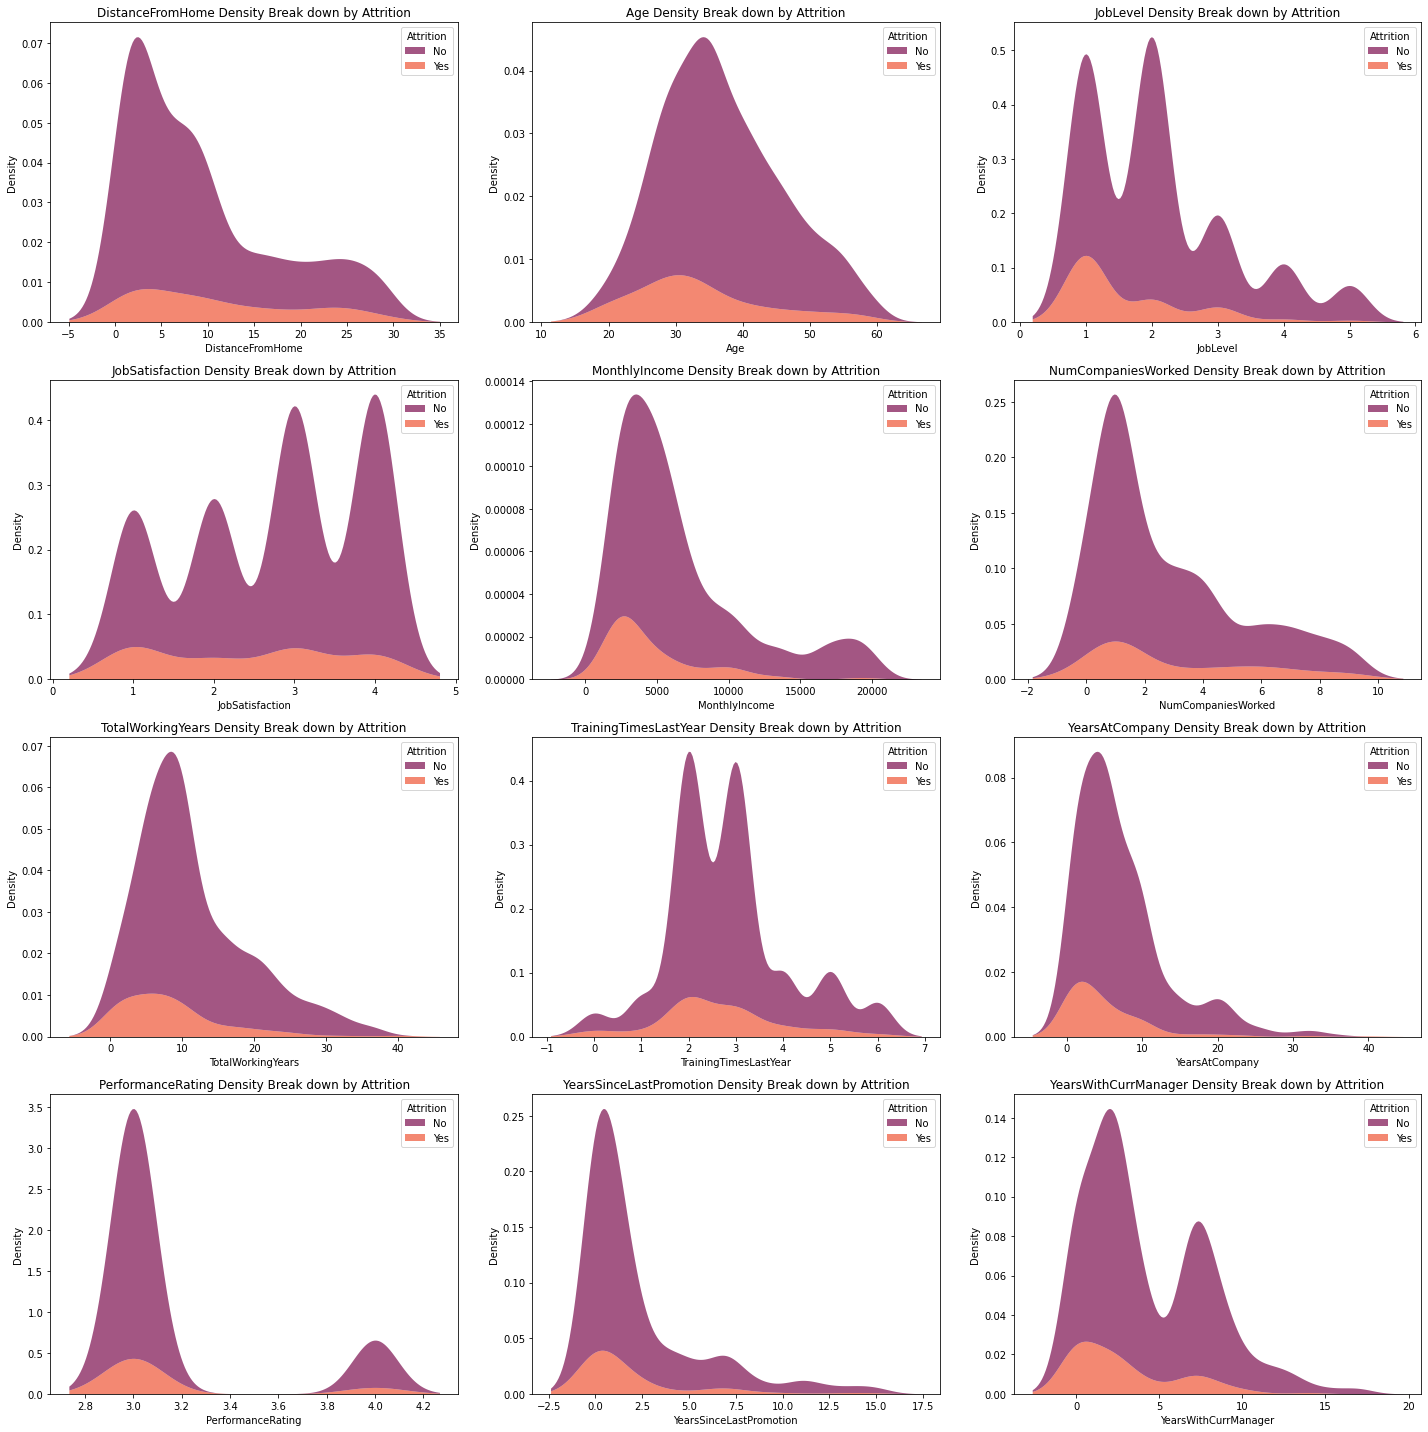

In [ ]:
fig, axes = plt.subplots(4, 3,figsize = (20,20))
axes = axes.flatten()

for i in range(len(plt_lst1)):
  col = plt_lst1[i]
  sns.kdeplot(data=train, x=col, hue="Attrition",multiple="stack", linewidth =0, palette="rocket",ax=axes[i])
  axes[i].set_title(f'{col} Density Break down by Attrition')
plt.tight_layout()

### Categorical Features EDA

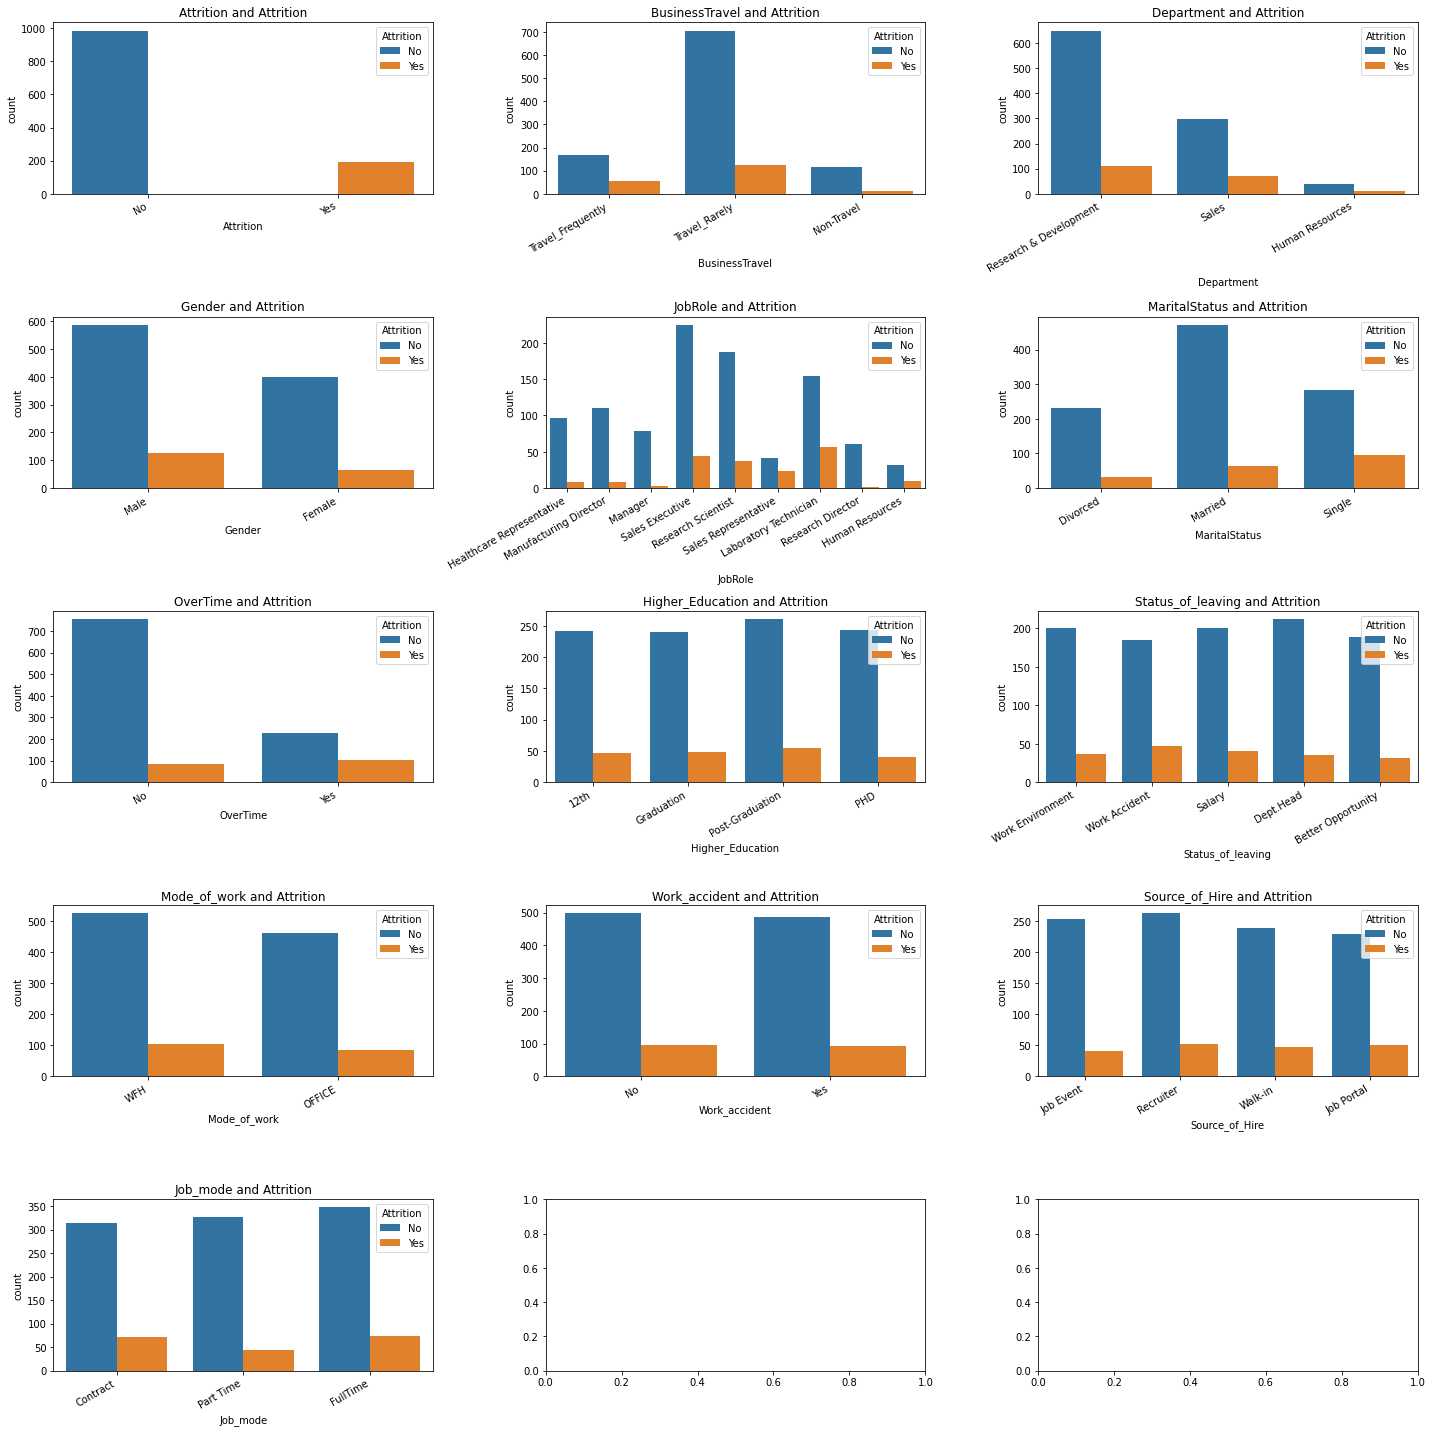

In [ ]:
fig, axes = plt.subplots(5, 3, figsize= (20,20))

axes = axes.flatten()

for i in range(len(cate_var)):
  col = cate_var[i]
  chart = sns.countplot(x=train[col], hue=train['Attrition'],ax=axes[i])
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
  axes[i].set_title(f'{col} and Attrition')
plt.tight_layout()

## Data Cleaning & Preprocessing

### Encoding

In [11]:
le_list = [col for col in train.columns if len(pd.unique(train[col])) ==2]

In [ ]:
le_list

['Gender',
 'OverTime',
 'PerformanceRating',
 'Mode_of_work',
 'Work_accident',
 'Attrition']

In [12]:
le = LabelEncoder()
for col in le_list:
  le.fit(train[col])
  train[col] = le.transform(train[col])
  test[col] = le.transform(test[col])

In [13]:
dum_list = [col for col in train.columns if len(pd.unique(train[col]))>2 and col in cate_var]

In [ ]:
dum_list

['BusinessTravel',
 'Department',
 'JobRole',
 'MaritalStatus',
 'Higher_Education',
 'Status_of_leaving',
 'Source_of_Hire',
 'Job_mode']

In [14]:
train = pd.get_dummies(train,columns=dum_list,drop_first= True)

In [15]:
test = pd.get_dummies(test,columns=dum_list,drop_first= True)

In [ ]:
train.head()

,Age,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Mode_of_work,Leaves,Absenteeism,Work_accident,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Higher_Education_Graduation,Higher_Education_PHD,Higher_Education_Post-Graduation,Status_of_leaving_Dept.Head,Status_of_leaving_Salary,Status_of_leaving_Work Accident,Status_of_leaving_Work Environment,Source_of_Hire_Job Portal,Source_of_Hire_Recruiter,Source_of_Hire_Walk-in,Job_mode_FullTime,Job_mode_Part Time
1097,33,7,1,3,2,3,5968,1,0,20,1,3,9,2,9,2,8,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
727,38,2,0,2,3,3,7756,3,1,19,0,1,10,6,5,0,2,0,4,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
254,44,3,1,3,5,4,19513,4,1,12,0,1,26,2,2,0,1,0,2,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
1175,31,2,0,3,3,3,9852,1,1,19,0,1,10,5,10,9,6,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1341,58,2,1,3,4,2,16291,4,0,22,1,1,37,0,16,14,14,1,4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler 

In [17]:
ss = StandardScaler()
ss.fit(train[num_var])
train[num_var] = ss.transform(train[num_var])
test[num_var] = ss.transform(test[num_var])

In [18]:
X_train = train.drop("Attrition", axis = 1)
y_train = train["Attrition"]

In [19]:
X_test = test.drop("Attrition", axis = 1)
y_test = test["Attrition"]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1097 to 1126
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1176 non-null   float64
 1   DistanceFromHome                    1176 non-null   float64
 2   Gender                              1176 non-null   int64  
 3   JobInvolvement                      1176 non-null   float64
 4   JobLevel                            1176 non-null   float64
 5   JobSatisfaction                     1176 non-null   float64
 6   MonthlyIncome                       1176 non-null   float64
 7   NumCompaniesWorked                  1176 non-null   float64
 8   OverTime                            1176 non-null   int64  
 9   PercentSalaryHike                   1176 non-null   float64
 10  PerformanceRating                   1176 non-null   float64
 11  StockOptionLevel                    1176

## Building Model

### Baseline model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = dict()
models["random forest"] = RandomForestClassifier()
models["logistic regression"] = LogisticRegression()
models["XGB"] = XGBClassifier()
models["knn3"] = KNeighborsClassifier(n_neighbors=3)
models["knn5"] = KNeighborsClassifier(n_neighbors=5)
models["knn7"] = KNeighborsClassifier(n_neighbors=7)
models["SVM"] = SVC()

In [ ]:
auc_results, acc_results, names = list(), list(),list()
for name, model in models.items():
  acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
  auc_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1, error_score='raise')
  acc_results.append(acc_scores)
  auc_results.append(auc_scores)
  names.append(name)
  print('>%s acc %.3f (%.3f) auc %.3f (%.3f)' % (name, np.mean(acc_scores), np.std(acc_scores),np.mean(auc_scores),np.std(auc_scores)))

>random forest acc 0.855 (0.009) auc 0.806 (0.031)
>logistic regression acc 0.862 (0.022) auc 0.821 (0.029)
>XGB acc 0.858 (0.017) auc 0.802 (0.037)
>knn3 acc 0.826 (0.008) auc 0.644 (0.042)
>knn5 acc 0.838 (0.010) auc 0.662 (0.036)
>knn7 acc 0.839 (0.011) auc 0.676 (0.036)
>SVM acc 0.851 (0.009) auc 0.792 (0.044)


### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
def hyper_tuning(model, param_dict):
  param = param_dict
  tuning = GridSearchCV(model, param_grid = param, cv = 5, verbose=True, n_jobs=-1)
  best_model = tuning.fit(X_train, y_train)
  print(best_model.best_score_,'\n',best_model.best_params_)
  return best_model

In [ ]:
### hyper parameter tuning for random forest 
rf_param = {'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5))}

rf_best_model = hyper_tuning(RandomForestClassifier(),rf_param)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.8605517490082943 
 {'max_features': 16, 'n_estimators': 60}


In [23]:
### hyper parameter tuning for logistic regression 
lr_param = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

lr_best_model = hyper_tuning(LogisticRegression(),lr_param)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.8715975477821853 
 {'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
### hyperparameter tuning for XGBoost
xgb_param = {
    'eta': list(np.arange(0.05, 0.31, 0.05)),
    'min_child_weight':list(range(1,6,2)),
    'max_depth': [3,6,10],
    'n_estimators': [100, 500, 1000]
     }

xgb_best_model = hyper_tuning(XGBClassifier(),xgb_param)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
0.8681788676523621 
 {'eta': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Classification report for Random Forest
print(classification_report(y_test, rf_best_model.predict(X_test)))

NameError: ignored

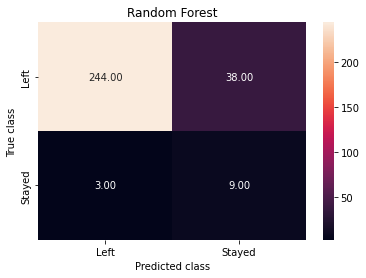

In [ ]:
#Confusion Matrix for Random Forest
y_pred = rf_best_model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
#Classification report for Logistic Regression
print(classification_report(y_test, lr_best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.82      0.30      0.44        47

    accuracy                           0.88       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.87      0.88      0.85       294



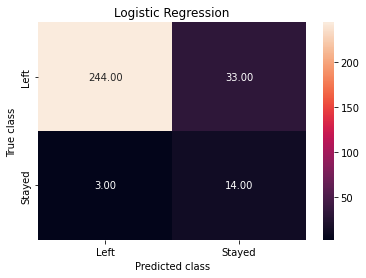

In [ ]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = lr_best_model.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [ ]:
#Classification report for XGBoost
print(classification_report(y_test, xgb_best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



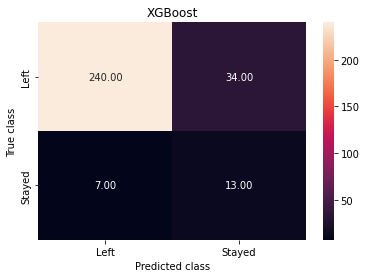

In [ ]:
#Confusion Matrix for XGBoost
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_cm = metrics.confusion_matrix(xgb_y_pred, y_test)
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost')
plt.savefig('XGBoost')

### Variable Importance for Random Forest Classifier

In [ ]:
pd.DataFrame({'features':rf_best_model.best_estimator_.feature_names_in_, 'importance':rf_best_model.best_estimator_.feature_importances_}).sort_values(by='importance',ascending= False)

,features,importance
6,MonthlyIncome,0.097480
0,Age,0.074373
8,OverTime,0.071772
1,DistanceFromHome,0.061757
12,TotalWorkingYears,0.054356
14,YearsAtCompany,0.047793
7,NumCompaniesWorked,0.043681
9,PercentSalaryHike,0.038181
5,JobSatisfaction,0.035615
4,JobLevel,0.033914


### Coefficient of Logistic Regression

In [28]:
coef_df = pd.DataFrame({'features':X_train.columns.values, 'coefficient':lr_best_model.best_estimator_.coef_[0],'abs_coef':abs(lr_best_model.best_estimator_.coef_[0])}).sort_values(by='abs_coef',ascending= False)

In [32]:
coef_df.sort_values(by="coefficient").head(10)

,features,coefficient,abs_coef
23,Department_Research & Development,-0.971815,0.971815
46,Job_mode_Part Time,-0.681567,0.681567
28,JobRole_Manufacturing Director,-0.425633,0.425633
5,JobSatisfaction,-0.413570,0.413570
16,YearsWithCurrManager,-0.409016,0.409016
38,Status_of_leaving_Dept.Head,-0.397473,0.397473
3,JobInvolvement,-0.389671,0.389671
41,Status_of_leaving_Work Environment,-0.314650,0.314650
36,Higher_Education_PHD,-0.294527,0.294527
29,JobRole_Research Director,-0.293745,0.293745


In [34]:
coef_df.sort_values(by="coefficient", ascending= False).head(10)

,features,coefficient,abs_coef
8,OverTime,1.429026,1.429026
26,JobRole_Laboratory Technician,0.661766,0.661766
21,BusinessTravel_Travel_Frequently,0.571745,0.571745
34,MaritalStatus_Single,0.390244,0.390244
7,NumCompaniesWorked,0.349628,0.349628
32,JobRole_Sales Representative,0.334441,0.334441
15,YearsSinceLastPromotion,0.332377,0.332377
1,DistanceFromHome,0.282654,0.282654
2,Gender,0.226144,0.226144
40,Status_of_leaving_Work Accident,0.108410,0.108410


### Variable Importance for XGBoost Classifier

In [ ]:
pd.DataFrame({'features':xgb_best_model.best_estimator_.get_booster().feature_names, 'importance':xgb_best_model.best_estimator_.feature_importances_}).sort_values(by='importance',ascending= False)

,features,importance
31,JobRole_Sales Executive,0.051524
8,OverTime,0.049414
30,JobRole_Research Scientist,0.043945
4,JobLevel,0.042360
25,JobRole_Human Resources,0.041515
32,JobRole_Sales Representative,0.033763
28,JobRole_Manufacturing Director,0.030964
11,StockOptionLevel,0.030433
41,Status_of_leaving_Work Environment,0.026139
7,NumCompaniesWorked,0.025621


## Cost and benefit analysis

In [24]:
X = pd.concat([X_train,X_test], axis=0)
X.shape

(1470, 47)

In [ ]:
X.head()

,Age,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Mode_of_work,Leaves,Absenteeism,Work_accident,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Higher_Education_Graduation,Higher_Education_PHD,Higher_Education_Post-Graduation,Status_of_leaving_Dept.Head,Status_of_leaving_Salary,Status_of_leaving_Work Accident,Status_of_leaving_Work Environment,Source_of_Hire_Job Portal,Source_of_Hire_Recruiter,Source_of_Hire_Walk-in,Job_mode_FullTime,Job_mode_Part Time
1097,-0.418138,-0.278001,1,0.367439,-0.066749,0.247898,-0.113588,-0.688707,0,1.302455,2.307072,2.575767,-0.302224,-0.644020,0.302753,-0.078296,1.053873,1,-0.885607,-1.399733,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
727,0.130668,-0.888627,0,-1.049310,0.835518,0.247898,0.264915,0.102230,1,1.031600,-0.433450,0.237595,-0.174652,2.518267,-0.334736,-0.686061,-0.592381,0,0.852113,1.354454,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
254,0.789236,-0.766501,1,0.367439,2.640053,1.158923,2.753765,0.497698,1,-0.864388,-0.433450,0.237595,1.866499,-0.644020,-0.812852,-0.686061,-0.866756,0,-0.306367,0.436392,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
1175,-0.637661,-0.888627,0,0.367439,0.835518,0.247898,0.708619,-0.688707,1,1.031600,-0.433450,0.237595,-0.174652,1.727695,0.462125,2.048880,0.505122,0,1.431353,-1.399733,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1341,2.325893,-0.888627,1,0.367439,1.737786,-0.663127,2.071697,0.497698,0,1.844166,2.307072,0.237595,3.269790,-2.225164,1.418358,3.568291,2.700127,1,0.852113,-1.399733,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [25]:
best_model = lr_best_model.best_estimator_
y_pred = best_model.predict_proba(X)
y = pd.concat([y_train,y_test], axis=0)

In [26]:
y_pred

array([[0.95801372, 0.04198628],
       [0.98041335, 0.01958665],
       [0.97745973, 0.02254027],
       ...,
       [0.92715952, 0.07284048],
       [0.91000534, 0.08999466],
       [0.59063043, 0.40936957]])

In [27]:
y_df = pd.DataFrame()
y_df[['1-y_prob','y_prob']]=pd.DataFrame(y_pred)
y_df['y_true']= y

In [ ]:
## assumptions
ret_cost, ret_bene, rpl_cost = 6000,72000,4000
ret_rate = 0.25
nature_loss = -237*rpl_cost

In [ ]:
cutoff_prob = np.arange(0,1,0.02)
cba_result = pd.DataFrame()
for prob in cutoff_prob:
  y_df["TP"] = y_df.apply(lambda row: True if (row.y_prob > prob) and (row.y_true == 1) else False, axis =1)
  y_df["FP"] = y_df.apply(lambda row: True if row.y_prob > prob and row.y_true == 0 else False, axis =1)
  y_df["FN"] = y_df.apply(lambda row: True if row.y_prob <= prob and row.y_true == 1 else False, axis =1)
  TP = y_df.TP.sum()
  FP = y_df.FP.sum()
  FN = y_df.FN.sum()
  expected_gain = TP*ret_rate*ret_bene - TP*ret_rate *ret_cost - FP*ret_cost - FN*rpl_cost - nature_loss
  row_df = pd.DataFrame([prob,TP,FP,FN,expected_gain]).T
  cba_result = pd.concat([cba_result,row_df], axis = 0)
cba_result.columns = ["Cutoff","TP","FP","FN","Expected_Value"]

In [ ]:
cba_result[cba_result.Expected_Value == cba_result.Expected_Value.max()]

,Cutoff,TP,FP,FN,Expected_Value
0,0.44,35.0,105.0,202.0,87500.0


In [ ]:
cba_result.reset_index(drop=True)

,Cutoff,TP,FP,FN,Expected_Value
0,0.00,237.0,1233.0,0.0,-2539500.0
1,0.02,200.0,1057.0,37.0,-2242000.0
2,0.04,174.0,914.0,63.0,-1917000.0
3,0.06,157.0,775.0,80.0,-1431500.0
4,0.08,138.0,670.0,99.0,-1191000.0
5,0.10,119.0,594.0,118.0,-1124500.0
6,0.12,109.0,540.0,128.0,-1005500.0
7,0.14,96.0,488.0,141.0,-960000.0
8,0.16,85.0,438.0,152.0,-885500.0
9,0.18,80.0,389.0,157.0,-694000.0


Text(0.5, 1.0, 'Expected Values')

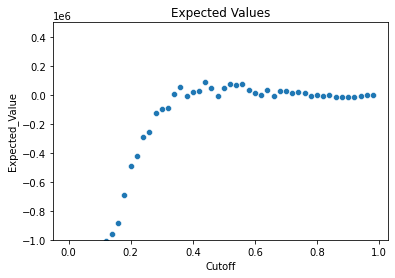

In [ ]:
sns.scatterplot(data = cba_result, x = "Cutoff", y = "Expected_Value")
plt.ylim((-1000000,500000))
plt.title("Expected Values")